# q4STEM: Robust local thickness estimation of sub-micrometer specimen by 4D-STEM

                        Code @ Radim Skoupý, TU Delft, ISI Brno 2023

## Instructions
For precise local thickness measurement both detector types have to meet several requirements.

### Direct detection 2D-STEM
- linear detector response and homogenous detector sensitivity in the whole imaging area
- known detection geometry

### Light conversion 2D-STEM
- coincident light/fluorescence microscope
- linear detector response and homogenous detector sensitivity in the whole imaging area
- known detection geometry
- biparallel cathodoluminescence screen
- focus to the upper scintillator surface

#### Cathodoluminescence screen
Light emitted during electron beam impact can be seen even with standard glass beam stopper (microscopy cover glass) but **low CL yield requires high electron dose**.
The solution lies in repacing the glass beam stopper with scintillator. They have higher refractive index than glass - **appropriate objective correction setting is needed!!**
        
| Material | Refractive index | Geom thick [mm] | Collar setting [mm] | Photon yeld at 300 K [kPh/MeV] | Wavelength of max. emission [nm] |
| ---    | ---   | ---   | ---    | --- | --- |
| Glass  | 1.515 | 0.17  | 0.170  |     |     |
| YAG:Ce | 1.82  | 0.17  | 0.204  | 30  | 550 |
| LYSO   | 1.79  | 0.17  | 0.201  | 30  | 425 |
| YAP:Ce | 1.95  | 0.17  | 0.219  | 25  | 370 |

#### Experimental settings
Appropriate experimental parameters are needed for accurate results. **Check the initial settings before every use!!** 
- **fixed settings** - when changed, new simulations are needed!! (beam energy 30 keV; virtual BF segment 0-50 mrad; virtual DF segment: 50-100 mrad)
- **very stable settings** - given by the used detector (calibration depth, objective magnification, real space pixel size, max. camera resolution, file type, bit depth)
- **stable settings** - given by optimal settings (binning, dwell time)
- **individual dataset dependent settings** (data matrix size, sample)

#### Absolute path to folder with dataset




In [1]:
# General python packgage
import ipywidgets as widgets
# q4STEM packages
from q4stem import q4stem
from q4stem import simul
from q4stem import calib
from q4stem import control

fc = widgets.interactive(control.directory)
display(fc)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

#### Chose your detector type and fill related fields

In [2]:
sett = widgets.interactive(control.init, pic = widgets.RadioButtons(options=['Direct detection', 'Light conversion'],description='Type:',));
display(sett)

interactive(children=(RadioButtons(description='Type:', options=('Direct detection', 'Light conversion'), valu…

## Electron scattering simulation results
The measuring process is based on the comparison of measured electron spreading characteristics with the simulated ones. Simulated dependencies are fitted by polynomial function (from linear to fifth order) and stored in form of polynomial coefficients.

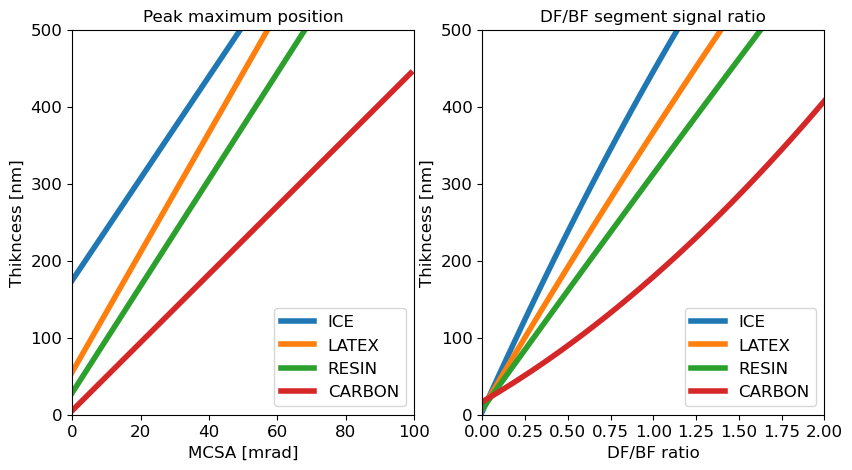

In [3]:
simul.show('mcsa')
simul.show('dfbf')

## Detector saturation control

Detector saturation would change results significantly. **Keep all datapoints below saturation level!!**

File processing: 100%|██████████| 198/198 [00:01<00:00, 180.88it/s]


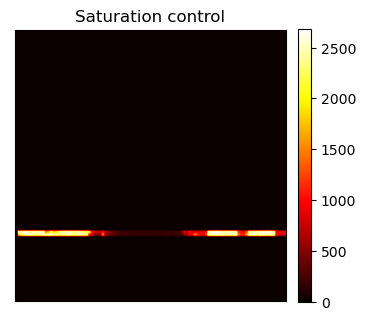

In [4]:
calib.mapping(fc.result.value, sett)

##  Thickness mapping

2D matrix of 2D scattering images can be used for spacial thickness distribution mapping. Individual points are analysed serially.

In [ ]:
maps = q4stem.mapping(fc.result.value, sett)   # Thickness maps creation
q4stem.mapshow(maps)  # Visualisation of calculated thickness distribution maps

## In-detail single pattern analysis

Individual spot related results are hiden in resulting thickness map. To control the processing, a single file can be procesed with visualisation of all important steps. It gives a tool for data revision and identification of isues.

### Scattering pattern preprocessing
Each scattering pattern is procesed with the same algorithm with the steps:
- Localisation of image maximum - centre detection
- ROI extraction around the centre - faster computation on smaller area
- Mean background intensity estimation - picking the pixels in the corners
- Background subtraction
- Center refinement

### Thickness estimation
Calling the individual method function with parameter "show = True" generates graph. 
- 2D images are reduced to 1D azimuthally integrated profiles 
- MCSA: profile is fited with polynom in order to smooth the profile
- MCSA: peak is detected
- DF/BF: integral signal in virtual segments is computed from raw profile
- both numbers (the most common scattering angle peak position in mrad and DF/BF virtual segment signal ratio) are compared with results of Monte Carlo electron simulation in known sample

In [ ]:
x = 75 # row
y = 51 # column
radprof = q4stem.details(fc.result.value,sett,x,y);

In [ ]:
q4stem.mcsa(radprof, sett, True);
q4stem.dfb(radprof, sett, True);